# Beer Recommender & Rating Predictor

* Student name: A. Utku Kale
* Student pace: NYC/Full time
* Scheduled project review date/time: 4/1/23
* Instructor name: Brendan Hutchinson & Joseph Mata
* Blog post URL: https://medium.com/@utkukale 

![image.png](image/img2.jpg)

## Project Overwiev

This machine learning project is designed to help Rum & Lemonade Bistro to recommend other beers to their customers based on their preferance and help  brew their in house beer in the best way possible. The project aims to identify the most important features of beers that can help with rating prediction and popularity.

## Data

The dataset used for this machine learning project is a Beer Information - Tasting Profiles dataset obtained from Kaggle, up to 50 top-rated beers across 112 styles, 5558 beers in total. Source: BeerAdvocate.com. 


The dataset is divided into two parts. The first ten columns consist of information about the beer provided by the source, as well as additional data like a unique key for each beer and its style. The last eleven columns, on the other hand, represent the tasting profile features of the beer and are calculated based on the frequency of words used in up to 25 reviews for each beer. The assumption behind this is that people who write reviews are more likely to describe what they have experienced rather than what they have not.

The columns in the dataset are as follows:

Name: Beer's Name
\
\
Key: A unique key assigned to each beer
\
\
Style: Beer's Style
\
\
Style Key: A unique key assigned to each beer style
\
\
Brewery: Name of the beer's source
\
\
Description: Notes on the beer if available
\
\
Ave Rating: The average rating of the beer at the time of collection
\
\
Min IBU: The minimum International Bitterness Units value each beer can possess. 
\
\
Max IBU: The maximum International Bitterness Units value each beer can possess.
\
\
(Mouthfeel)
\
Astringency \
Body \
Alcohol \
\
\
(Taste) \
Bitter \
Sweet \
Sour \
Salty \
\
\
(Flavor And Aroma) \
Fruits \
Hoppy \
Spices \
Malty 
\
\
\
\
This dataset can be used to train a machine learning model to predict the average rating of a beer based on its features. The features in the dataset can also be analyzed to identify the most important ones for beer recommendations and beer rating predictions for Rum & Lemonade Bistro.



## Project steps
The data modeling process involved an exploratory data analysis phase, followed by the creation of baseline models and more advanced models using pipelines and grid searches. The performance of these models was evaluated on a hold-out test set, and the best-performing model was identified for rating prediction. Metric for this project is RMSE.

In [29]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import mean_squared_error, r2_score
from joypy import joyplot
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge
import xgboost as xgb
from PIL import Image

## Exploratory Data Analysis

In this chapter, I will perform a comprehensive EDA of the Beer Profiles dataset, including investigation for any duplicate or null values, summary statistics, and correlation analysis. I will explore the distribution, range, and variability of each feature, as well as their relationships with each other and the target variable "Ave Rating". The insights and observations from this EDA will help the upcoming steps in my project, such as selecting relevant features, preprocessing the data, and fine-tuning the model. This chapter will provide a comprehensive overview of the data, its characteristics, and its suitability for the genre classification task, as well as demonstrate the importance of EDA in the data science workflow.

In [2]:
# Loading the dataset into a Pandas DataFrame from a CSV file
df = pd.read_csv('data/beer_data_set.csv')

# Printing the first five rows of the DataFrame to check if the data was loaded correctly
df.head()

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111
1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,...,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,253,Altbier,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,...,37,6,42,43,11,0,10,54,4,62
3,Doppelsticke,254,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,...,55,31,47,101,18,1,49,40,16,119
4,Scurry,255,Altbier,8,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25,50,...,69,10,63,120,14,0,19,36,15,218


In [3]:
# Printing the shape of the dataset.
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

# Printing descriptive statistics of the numerical columns in the DataFrame, such as count, mean, std, min, max, and quartiles
df.describe().T

The dataset has 5558 rows and 21 columns.


,count,mean,std,min,25%,50%,75%,max
key,5558.0,2779.500000,1604.600729,1.00,1390.25,2779.50,4168.75,5558.00
Style Key,5558.0,64.449082,35.814930,2.00,34.00,64.00,95.00,126.00
ABV,5558.0,6.633730,2.521660,0.00,5.00,6.00,7.90,57.50
Ave Rating,5558.0,3.760239,0.442951,1.27,3.59,3.82,4.04,4.83
Min IBU,5558.0,20.715545,13.736873,0.00,10.00,20.00,25.00,65.00
Max IBU,5558.0,38.452321,22.184524,0.00,25.00,35.00,45.00,100.00
Astringency,5558.0,15.938647,11.624254,0.00,8.00,14.00,22.00,83.00
Body,5558.0,42.746132,28.589959,0.00,25.00,38.00,55.00,197.00
Alcohol,5558.0,15.975171,18.268342,0.00,5.00,10.00,20.00,139.00
Bitter,5558.0,34.316121,27.118100,0.00,13.00,29.00,51.00,150.00


In [4]:
# Printing information about the DataFrame, including the data types of each column and the number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5556 non-null   object 
 1   key          5558 non-null   int64  
 2   Style        5558 non-null   object 
 3   Style Key    5558 non-null   int64  
 4   Brewery      5558 non-null   object 
 5   Description  5558 non-null   object 
 6   ABV          5558 non-null   float64
 7   Ave Rating   5558 non-null   float64
 8   Min IBU      5558 non-null   int64  
 9   Max IBU      5558 non-null   int64  
 10  Astringency  5558 non-null   int64  
 11  Body         5558 non-null   int64  
 12  Alcohol      5558 non-null   int64  
 13  Bitter       5558 non-null   int64  
 14  Sweet        5558 non-null   int64  
 15  Sour         5558 non-null   int64  
 16  Salty        5558 non-null   int64  
 17  Fruits       5558 non-null   int64  
 18  Hoppy        5558 non-null   int64  
 19  Spices

In [6]:
# Checking for missing values in each column of the DataFrame and print the total number of missing values
df.isna().sum()

Name           2
key            0
Style          0
Style Key      0
Brewery        0
Description    0
ABV            0
Ave Rating     0
Min IBU        0
Max IBU        0
Astringency    0
Body           0
Alcohol        0
Bitter         0
Sweet          0
Sour           0
Salty          0
Fruits         0
Hoppy          0
Spices         0
Malty          0
dtype: int64

In [76]:
df[df['Name'].isna()]

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
1803,NaN,3504,Kvass,81,Monastyrskiy Kvas,Notes:,1.5,3.07,0,0,...,34,4,15,84,16,1,33,14,7,68
2150,NaN,2401,Lager - European Pale,57,Stella Artois,Notes:,5.0,3.11,18,25,...,14,10,20,19,3,0,1,26,3,26


2 missing values in Name column, I can fill the name column manually.

In [8]:
df.loc[1803,'Name'] = 'Monastyrskiy Kvas'
df.loc[2150,'Name'] = 'Stella Artois'

In [9]:
# Checking for duplicated rows in the DataFrame and print the total number of duplicates
df.duplicated().sum()

0

In [11]:
# Finding the top-rated beers based on the review_overall column
top_rated = df[['Name', 'Style', 'Brewery','ABV','Ave Rating']].sort_values('Ave Rating', ascending=False).reset_index().head(10)
top_rated

,index,Name,Style,Brewery,ABV,Ave Rating
0,499,eisbock,Bock - Eisbock,Kulmbacher Kommunbräu,9.20,4.83
1,4779,Marshmallow Handjee,Stout - Russian Imperial,3 Floyds Brewing Co.,15.00,4.81
2,1750,Heady Topper,IPA - New England,The Alchemist,8.00,4.76
3,1777,King Julius,IPA - New England,Tree House Brewing Company,8.30,4.76
4,2919,Zenne Y Frontera,Lambic - Traditional,Brouwerij 3 Fonteinen,7.00,4.75
5,1793,Very Hazy,IPA - New England,Tree House Brewing Company,8.60,4.75
6,1727,Pliny The Younger,IPA - Imperial,Russian River Brewing Company,10.25,4.75
7,284,Drone Witch,Bière de Champagne / Bière Brut,Heirloom Rustic Ales,6.60,4.74
8,4463,Bourbon County Brand Coffee Stout,Stout - American Imperial,Goose Island Beer Co.,12.90,4.73
9,1784,Juice Machine,IPA - New England,Tree House Brewing Company,8.20,4.71


(4.25, 5.0)

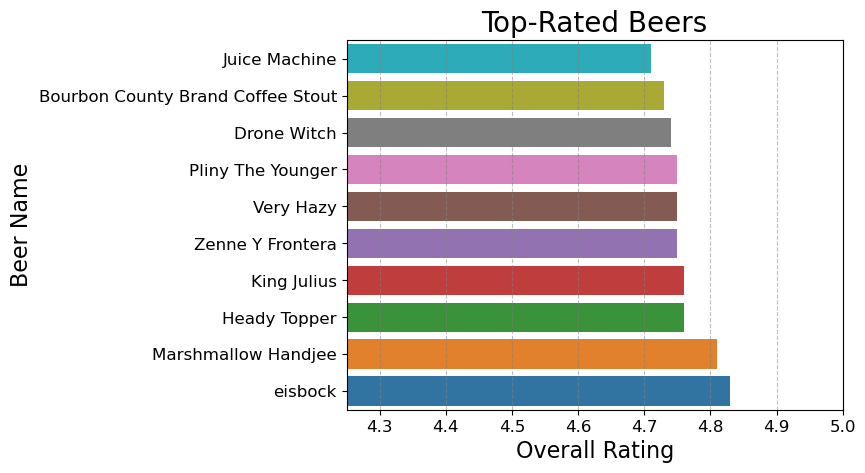

In [12]:
# Creating a Bar plot to visualize top rated beers
sns.barplot(top_rated, x='Ave Rating', y='Name')
plt.title('Top-Rated Beers', fontsize=20)
plt.xlabel('Overall Rating', fontsize=16)
plt.ylabel('Beer Name', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False, axis='y')
plt.grid(axis='x', linestyle='--', color='grey', alpha=0.5)
plt.ylim(-0.5, 9.5)
plt.xlim(4.25, 5.0)

In [13]:
# Finding the lowest-rated beers based on the review_overall column
lowest_rated = df[['Name', 'Style', 'Brewery','ABV','Ave Rating']].sort_values('Ave Rating', ascending=False).reset_index().tail(10)
lowest_rated

,index,Name,Style,Brewery,ABV,Ave Rating
5548,1918,Natural Ice,Lager - Adjunct,Anheuser-Busch,5.9,1.70
5549,1930,Keystone IceCoors Brewing Company (Molson-Coors),Lager - Adjunct,Coors Brewing Company (Molson-Coors),5.9,1.65
5550,1375,FiLite,Happoshu,Hite Brewery Company LTD,4.5,1.64
5551,992,El Lapino,Chile Beer,Microbrasserie du Lièvre,5.4,1.63
5552,2456,Natural Light,Lager - Light,Anheuser-Busch,4.2,1.58
5553,2967,Sharp's,Low Alcohol Beer,Miller Brewing Co.,0.4,1.57
5554,2471,Budweiser Select 55,Lager - Light,Anheuser-Busch,2.4,1.53
5555,2478,Miller Genuine Draft 64,Lager - Light,Miller Brewing Co.,3.0,1.50
5556,2533,Evil Eye,Lager - Malt Liquor,Melanie Brewing Company,10.0,1.48
5557,2399,Siamsato,Lager - Japanese Rice,Siamsato Brewery,8.0,1.27


(0.0, 3.0)

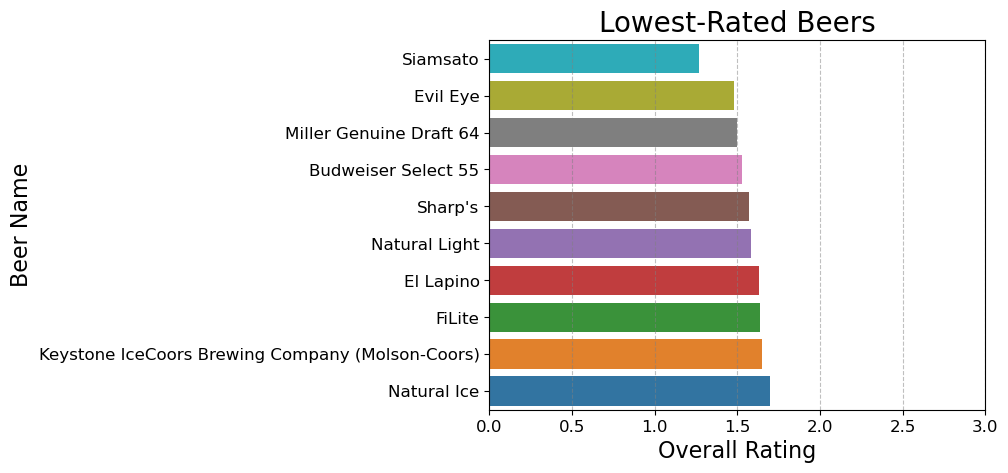

In [14]:
# Creating a Bar plot to visualize lowest rated beers
sns.barplot(lowest_rated, x='Ave Rating', y='Name')
plt.title('Lowest-Rated Beers', fontsize=20)
plt.xlabel('Overall Rating', fontsize=16)
plt.ylabel('Beer Name', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False, axis='y')
plt.grid(axis='x', linestyle='--', color='grey', alpha=0.5)
plt.ylim(-0.5, 9.5)
plt.xlim(0, 3.0)

In [15]:
# Finding the top rated breweries based on the review_overall column
top_rated_breweries = df[['Name', 'Style', 'Brewery','ABV','Ave Rating']].groupby('Style').mean().sort_values('Ave Rating')
top_rated_breweries

,ABV,Ave Rating
Style,,
Lager - Malt Liquor,7.639600,2.35920
Lager - Light,3.978800,2.40400
Lager - Adjunct,4.815400,2.62860
Low Alcohol Beer,0.442600,2.85360
Lager - European Strong,8.718000,2.94380
...,...,...
Stout - Russian Imperial,11.049000,4.23320
IPA - Imperial,9.414000,4.27200
Wild Ale,7.668163,4.30551


Highest rated beer is Bock eisbock with 4.83 and lowest rated beer is Japanese Rice Lager Siamsoto with 1.27. Top three highest rated beer styles are IPA - New England, Stout - American Imperial and Wild Ale. 

In [16]:
# I will create a dataframe for numeric columns to observe their relationship.
df_numeric = df[['ABV', 'Ave Rating','Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices','Malty']]

In [17]:
# Using MinMaxScaler to scale numeric values.
scaler = MinMaxScaler(feature_range=(-1,1))
df2 = scaler.fit_transform(df_numeric)
df_num_sc = pd.DataFrame(df2, index=df_numeric.index, columns=df_numeric.columns)
df_num_sc.describe().T

,count,mean,std,min,25%,50%,75%,max
ABV,5558.0,-0.769262,0.087710,-1.0,-0.826087,-0.791304,-0.725217,1.0
Ave Rating,5558.0,0.399011,0.248849,-1.0,0.303371,0.432584,0.556180,1.0
Min IBU,5558.0,-0.362599,0.422673,-1.0,-0.692308,-0.384615,-0.230769,1.0
Max IBU,5558.0,-0.230954,0.443690,-1.0,-0.500000,-0.300000,-0.100000,1.0
Astringency,5558.0,-0.615936,0.280103,-1.0,-0.807229,-0.662651,-0.469880,1.0
Body,5558.0,-0.566029,0.290253,-1.0,-0.746193,-0.614213,-0.441624,1.0
Alcohol,5558.0,-0.770141,0.262854,-1.0,-0.928058,-0.856115,-0.712230,1.0
Bitter,5558.0,-0.542452,0.361575,-1.0,-0.826667,-0.613333,-0.320000,1.0
Sweet,5558.0,-0.592169,0.272746,-1.0,-0.794677,-0.623574,-0.437262,1.0
Sour,5558.0,-0.785695,0.246751,-1.0,-0.944272,-0.869969,-0.727554,1.0


After scaling my numeric dataset, I will divide each feature into 5 intervals. This will help me to observe and interpret visualizations easier. 

In [22]:
# Define the categories and labels for each column
categories = {
    'ABV': ['1','2','3','4','5'],
    'Ave Rating': ['1','2','3','4','5'],
    'Min IBU': ['1','2','3','4','5'],
    'Max IBU': ['1','2','3','4','5'],
    'Astringency': ['1','2','3','4','5'],
    'Body': ['1','2','3','4','5'],
    'Alcohol': ['1','2','3','4','5'],
    'Bitter': ['1','2','3','4','5'],
    'Sweet': ['1','2','3','4','5'],
    'Sour': ['1','2','3','4','5'],
    'Salty': ['1','2','3','4','5'],
    'Fruits': ['1','2','3','4','5'],
    'Hoppy': ['1','2','3','4','5'],
    'Spices': ['1','2','3','4','5'],
    'Malty': ['1','2','3','4','5']
}

# Loop through each column and create categories using the cut function
for col in categories.keys():
    df_num_sc[col] = pd.cut(df_num_sc[col], bins=5, labels=categories[col])

# Verify that the column values have been replaced with category names


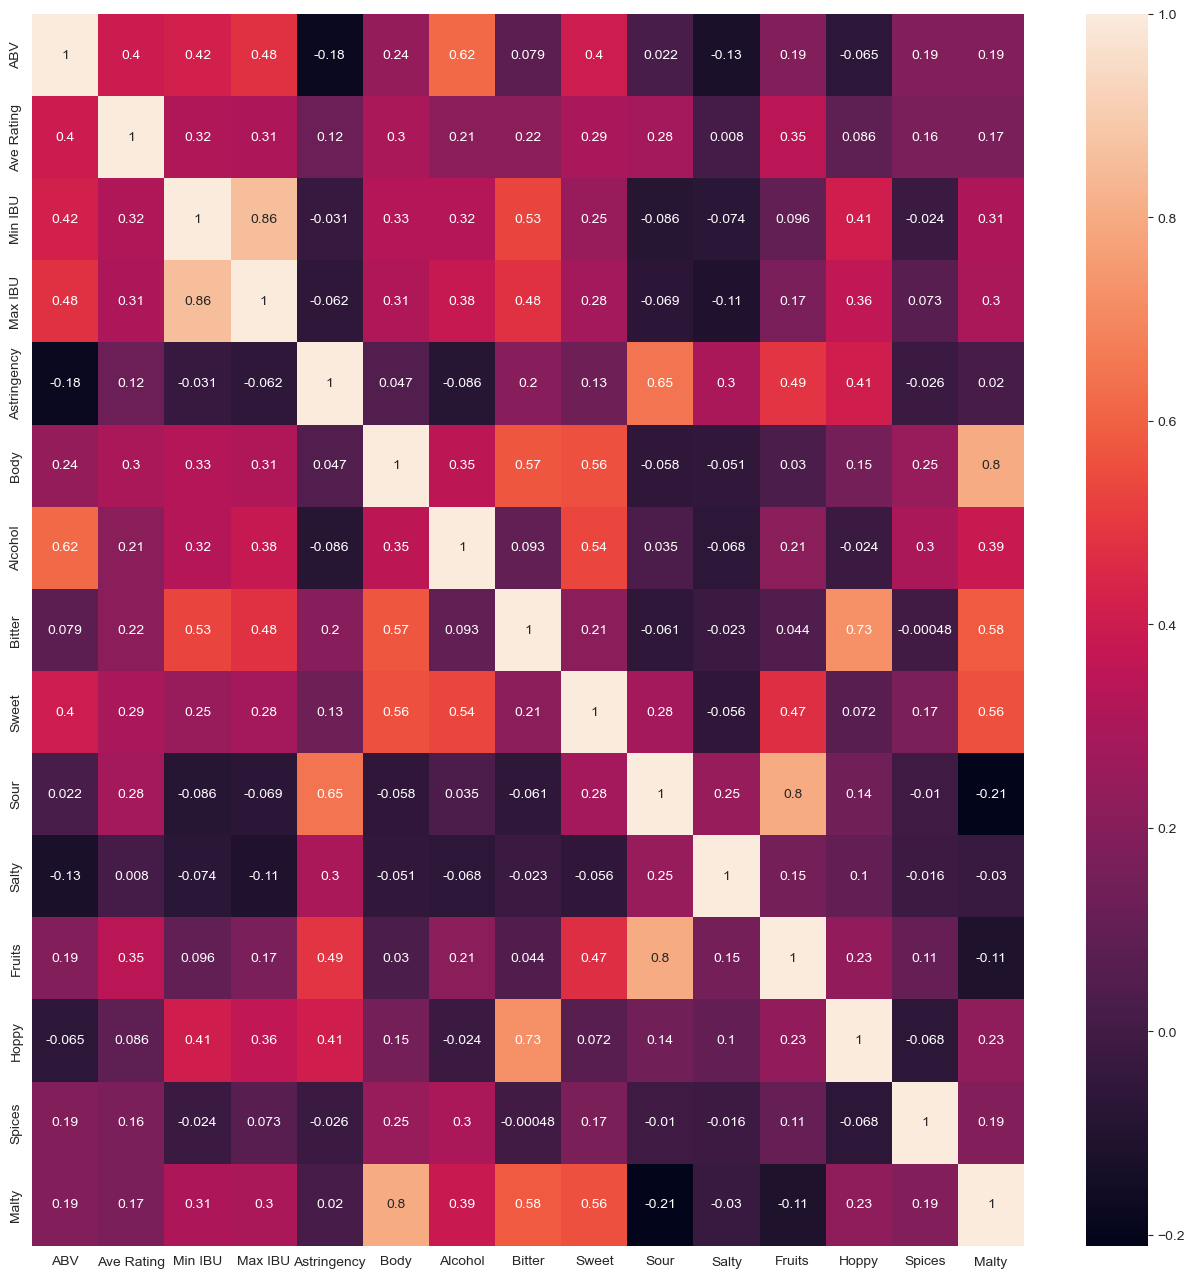

In [23]:
# Creating the heatmap to check for multicollinearity and correlation of Ave Rating and features.
plt.figure(figsize=(16,16))
sns.heatmap(df_numeric.corr(), annot = True)
plt.show()

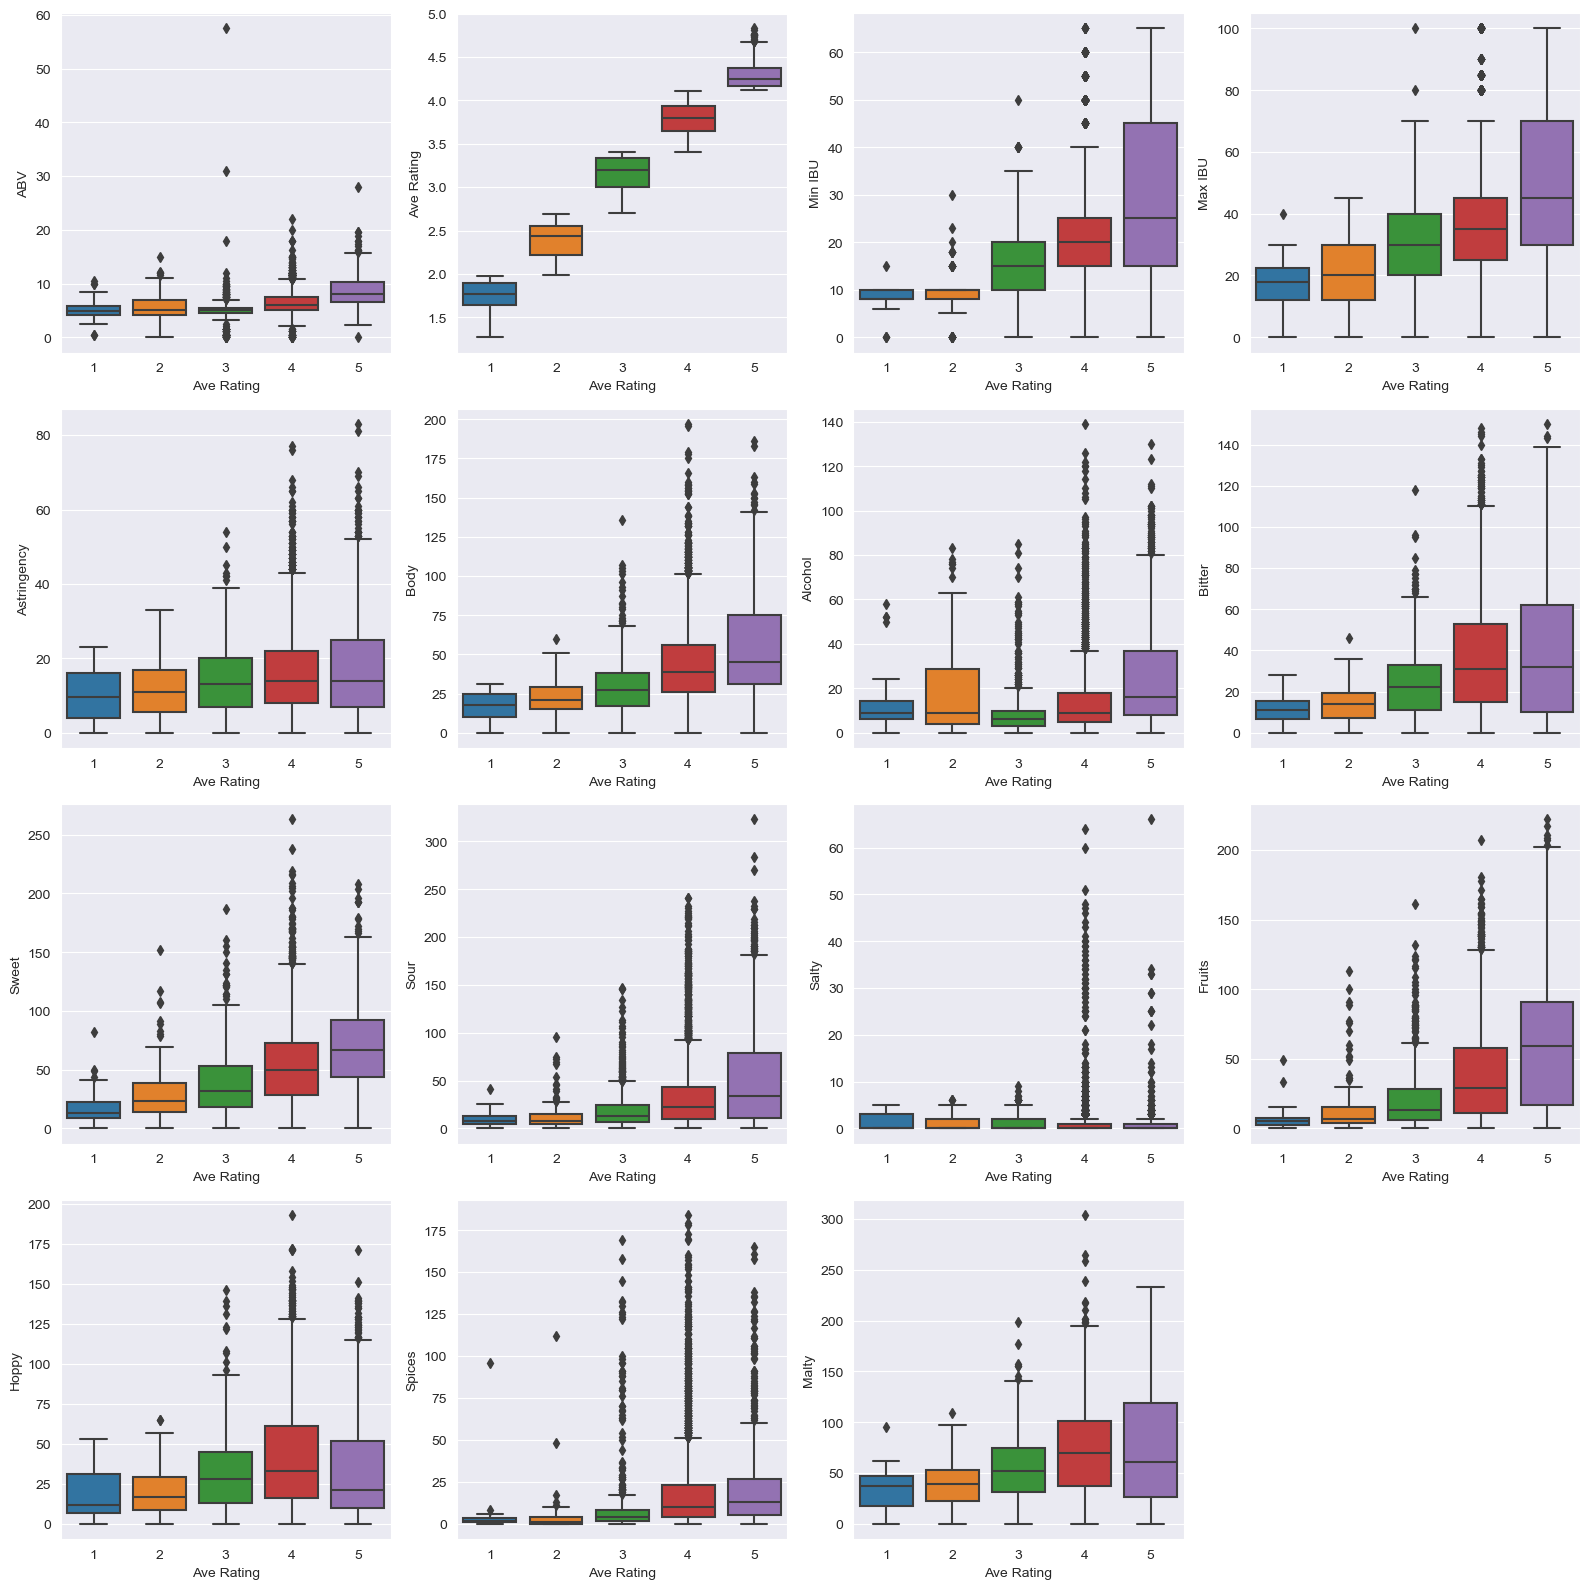

In [25]:
# Creating boxplots to check correlation of Ave Rating and features.
plt.figure(figsize=(16,16))
for i, col in enumerate(df_numeric.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df_numeric[col],x=df_num_sc['Ave Rating'] )
    sns.set_style("darkgrid")
plt.tight_layout()

plt.show()

[]

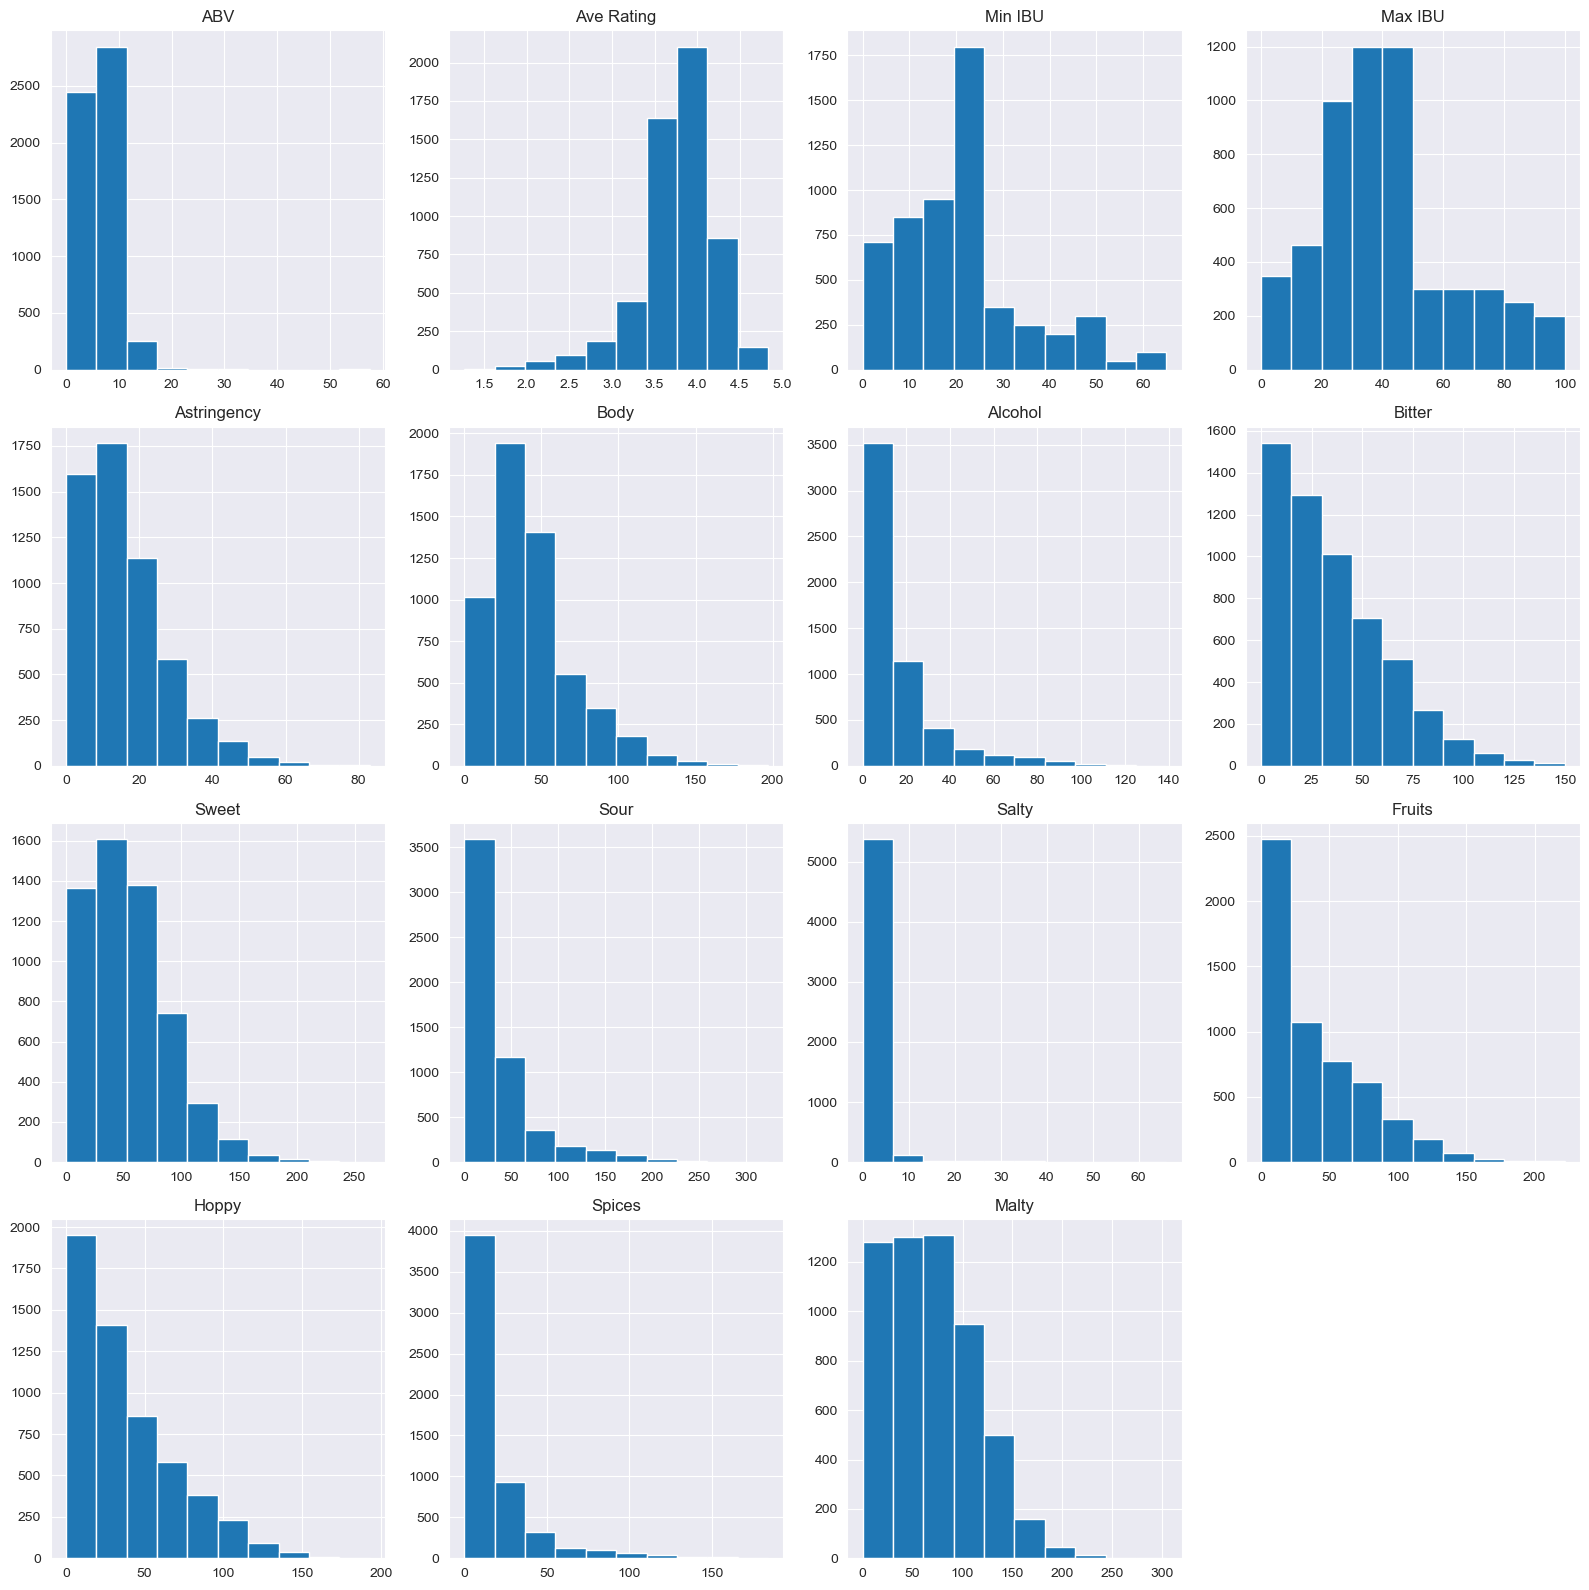

In [367]:
# Creating scatter plots, histograms and distribution plots to visualize distribution of features and target.
df_numeric.hist(figsize=(16,16))
plt.tight_layout()
plt.plot()

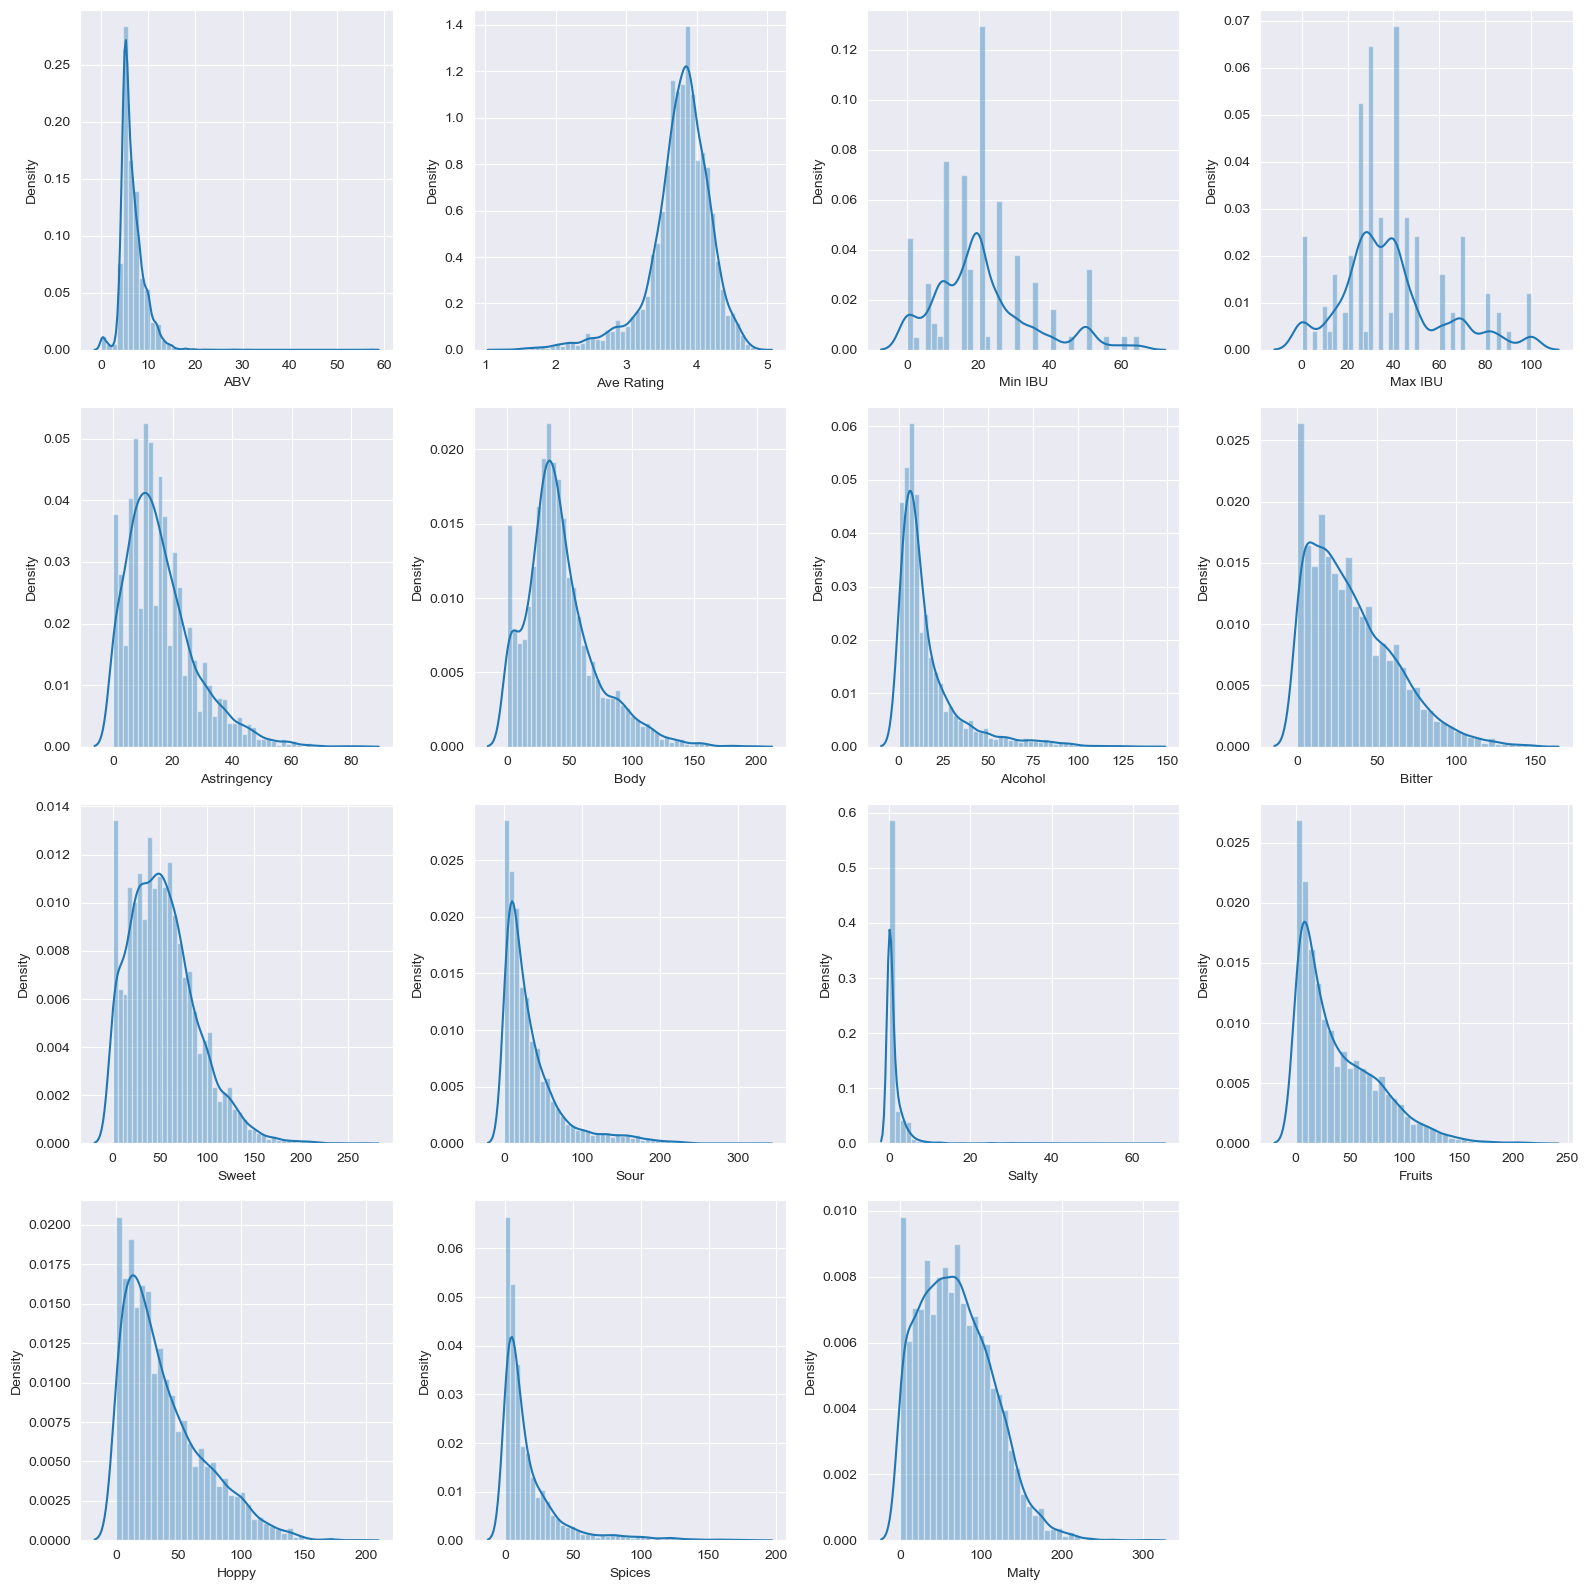

In [26]:
plt.figure(figsize=(16,16))
for i, col in enumerate(df_numeric.columns):
    plt.subplot(4,4,i+1)
    sns.distplot(df_numeric[col])
    sns.set_style("darkgrid")
plt.tight_layout()

plt.show()



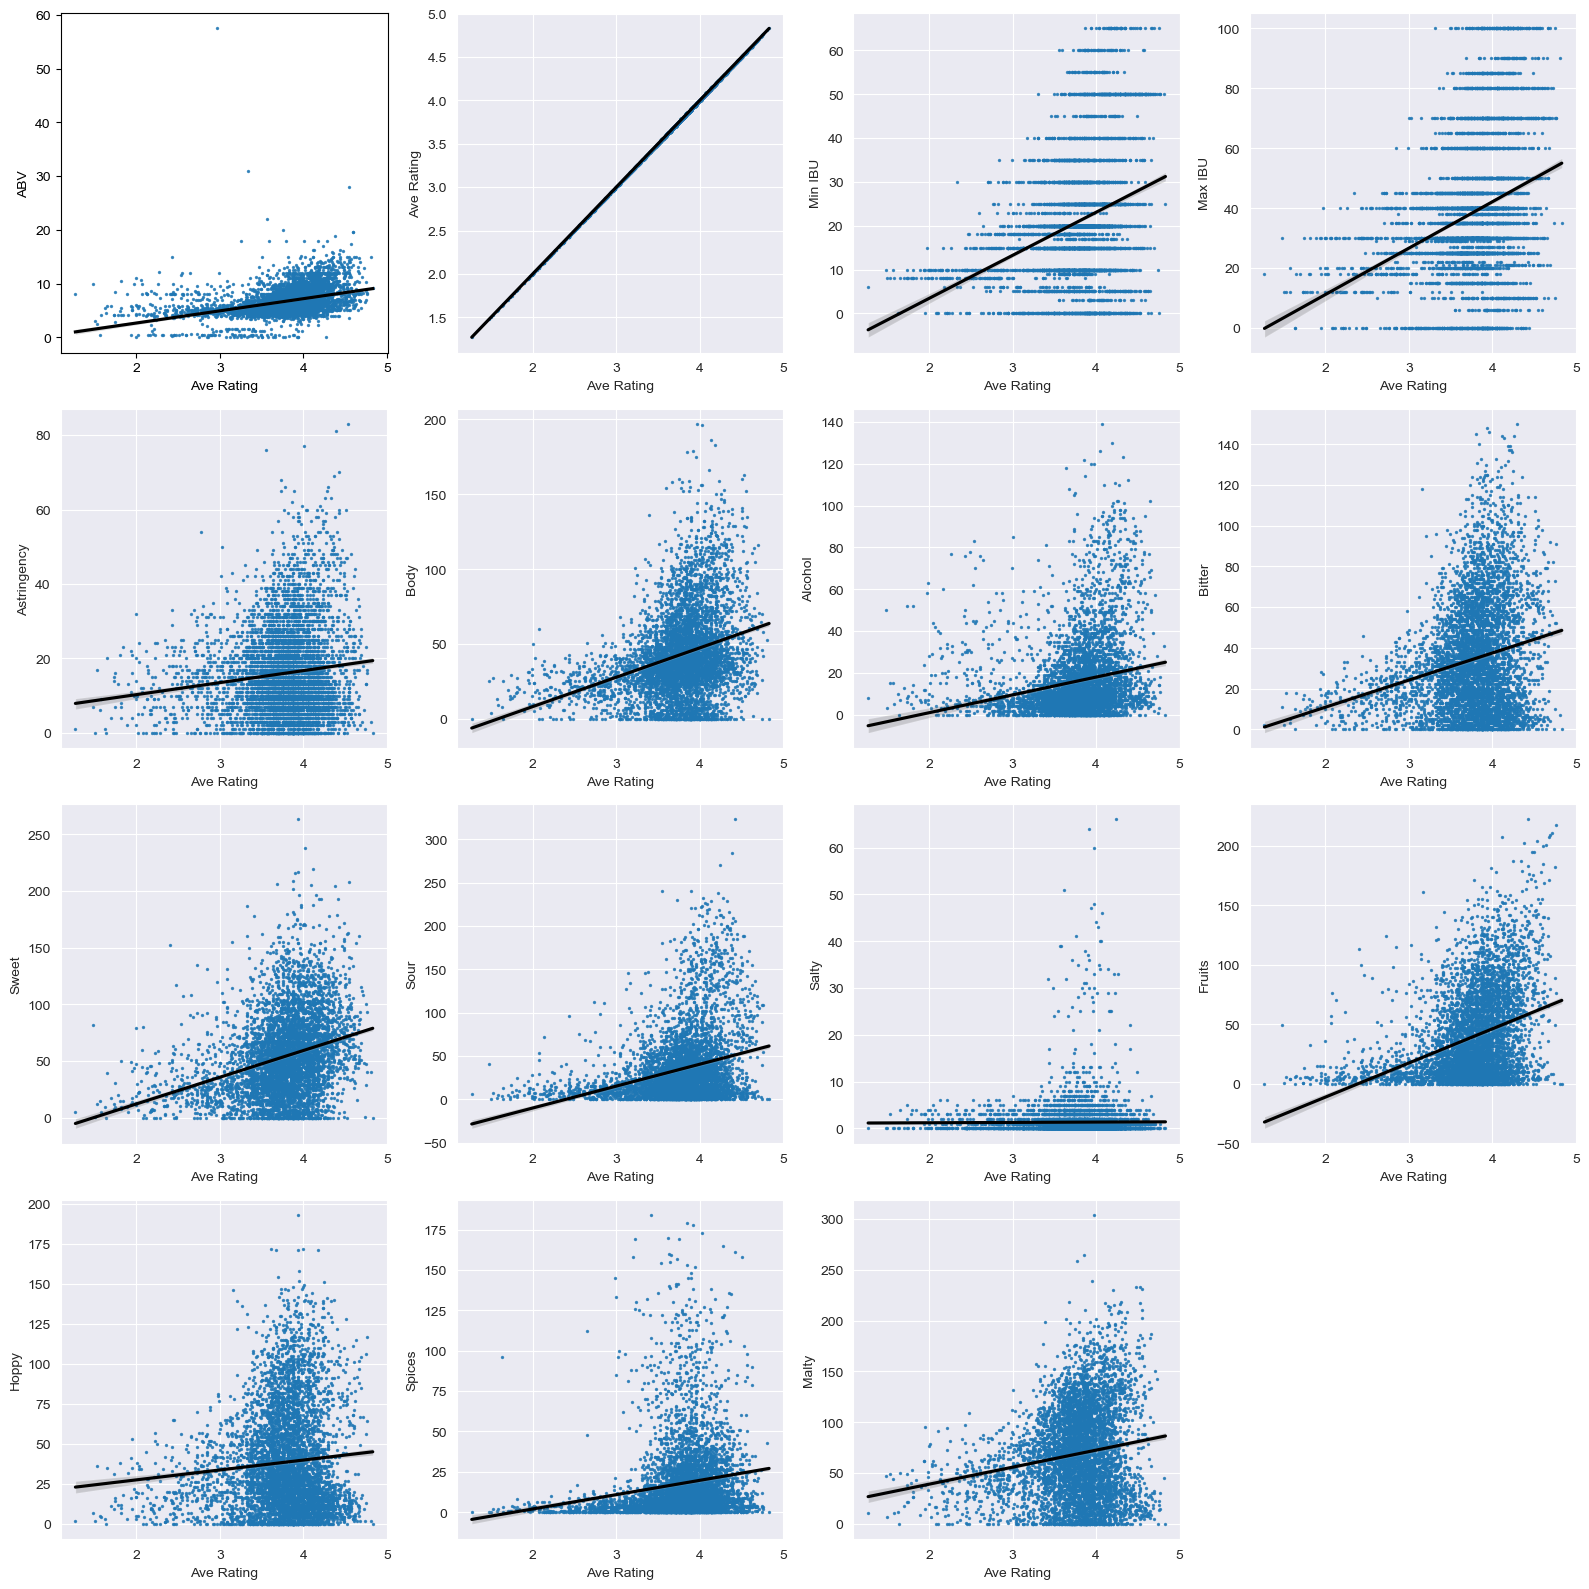

In [184]:
plt.figure(figsize=(16,16))
for i, col in enumerate(df_numeric.columns):
    plt.subplot(4,4,i+1)
    sns.regplot(df_numeric, x='Ave Rating', y=col, line_kws={"color": "black"}, scatter_kws={'s':2})
    sns.set_style("darkgrid")
plt.tight_layout()

plt.show()

From the EDA, there is no strong correlation between features and target. Target 'Ave Rating' is mainly distributed between 3 and 4.5 rating. Some of the features such as 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sour', 'Fruits', 'Hoppy', 'Spices' has skewness, I will use log transform to help transform their distribution to normal.For the categorical features 'Style' and 'Brewery' I will use encoder. 

## Data preprocessing & running the regression models

##### Data preprocessing with transformers

In [32]:
# Dropping unnecessary columns
df_pp = df.drop(columns=['key', 'Style Key','Description','Name','Salty'], axis=1)
# Converting the 'Style' and 'Brewery' columns into categorical data
df_pp['Style'] = pd.Categorical(df['Style'])
df_pp['Brewery'] = pd.Categorical(df['Brewery'])
# Defining the numeric and categorical transformers for ColumnTransformer
num_transformer = ('scaler', StandardScaler(),  ['ABV', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Fruits', 'Hoppy', 'Spices', 'Malty'])
cat_transformer = ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Style','Brewery'])
log_transformer = ('log', FunctionTransformer(lambda x: np.log(x + 1e-6)),['Astringency', 'Body', 'Alcohol', 'Bitter', 'Sour', 'Fruits', 'Hoppy', 'Spices'] )
# Creating the ColumnTransformer preprocessor using the transformers
preprocessor = ColumnTransformer(transformers=[log_transformer,num_transformer, cat_transformer])


##### Train test split

In [33]:
# I'm defining my target column y and predictor columns X
y = df_pp['Ave Rating']
X = df_pp.drop(columns='Ave Rating')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10, test_size=0.2)

### 1st Model: Random Forest

In [35]:
# Creating a pipeline that includes preprocessing and Random Forest Regressor
pipe_rf = Pipeline([('preprocessing',preprocessor),('rf',RandomForestRegressor())])

# Fitting the pipeline on the training data
pipe_rf.fit(X_train, y_train)

# Printing the mean validation score of the pipeline
print("Validation score: ", cross_val_score(pipe_rf,X_train,y_train).mean())

#Test data accuracy score 
y_pred_test_rf = pipe_rf.predict(X_test)
rftestscore = r2_score(y_test, y_pred_test_rf)
rftestscorermse = mean_squared_error(y_test, y_pred_test_rf, squared=False)
#Train data accuracy score
y_pred_train_rf = pipe_rf.predict(X_train)
rftrainscore = r2_score(y_train, y_pred_train_rf)
rftrainscorermse = mean_squared_error(y_train, y_pred_train_rf, squared=False)
print(f"Train Score: {rftrainscore}, Test Score: {rftestscore}")
print(f"Train RMSE: {rftrainscorermse}, Test RMSE: {rftestscorermse}")

Validation score:  0.6617900419002088
Train Score: 0.9551821822074585, Test Score: 0.7120772025322233
Train RMSE: 0.0932614491226829, Test RMSE: 0.24267041041380905


In [36]:
# Defining a hyperparameter grid for Random Forest
rf_grid = {
   'rf__n_estimators': [100,200,500,800],
    'rf__max_depth': [3,6,8,10] }

In [121]:
# Defining a GridSearchCV object to search for the best hyperparameters for the pipeline with the hyperparamater grid
rf_gs = GridSearchCV(estimator=pipe_rf, param_grid=rf_grid,n_jobs=-1, cv=5)

# Fitting the GridSearchCV object on the training data
rf_model = rf_gs.fit(X_train,y_train)

# Printing validation score and best hyperparemeters
print("Validation score: ", rf_gs.best_score_)
print("Best hyperparameters: ", rf_gs.best_params_)

#Test data accuracy score 
y_pred_test_rf = rf_model.best_estimator_.predict(X_test)
rftestscore = r2_score(y_test, y_pred_test_rf)
rftestscorermse = mean_squared_error(y_test, y_pred_test_rf, squared=False)
#Train data accuracy score
y_pred_train_rf = rf_model.best_estimator_.predict(X_train)
rftrainscore = r2_score(y_train, y_pred_train_rf)
rftrainscorermse = mean_squared_error(y_train, y_pred_train_rf, squared=False)
print(f"Train R2: {rftrainscore}, Test R2: {rftestscore}")
print(f"Train RMSE: {rftrainscorermse}, Test RMSE: {rftestscorermse}")

Validation score:  0.6155723668792664
Best hyperparameters:  {'rf__max_depth': 10, 'rf__n_estimators': 100}
Train R2: 0.7365718721581428, Test R2: 0.6618903884533445
Train RMSE: 0.22610380905112318, Test RMSE: 0.2629708174425402


### 2nd Model: Linear Regression

In [266]:
# Creating a pipeline that includes preprocessing and Linear Regression
pipe_lr = Pipeline([('preprocessing',preprocessor),('lr', LinearRegression())])

# Fitting the pipeline on the training data
pipe_lr.fit(X_train, y_train)

# Printing the mean validation score of the pipeline
print("Validation score: ", cross_val_score(pipe_lr,X_train,y_train).mean())

#Test data accuracy score 
y_pred_test_lr = pipe_lr.predict(X_test)
lrtestscore = r2_score(y_test, y_pred_test_lr)
lrtestscorermse = mean_squared_error(y_test, y_pred_test_lr,squared=False)
#Train data accuracy score
y_pred_train_lr = pipe_lr.predict(X_train)
lrtrainscore = r2_score(y_train, y_pred_train_lr)
lrtrainscorermse = mean_squared_error(y_train, y_pred_train_lr,squared=False)
print(f"Train R2: {lrtrainscore}, Test R2: {lrtestscore}")
print(f"Train RMSE: {lrtrainscorermse}, Test RMSE: {lrtestscorermse}")

Validation score:  0.6964867137150689
Train R2: 0.8867898938492323, Test R2: 0.7272459566827825
Train RMSE: 0.14822429891057315, Test RMSE: 0.23619157198680998


I received a better score for this model. I will check feature importances to see which features affect target the most.

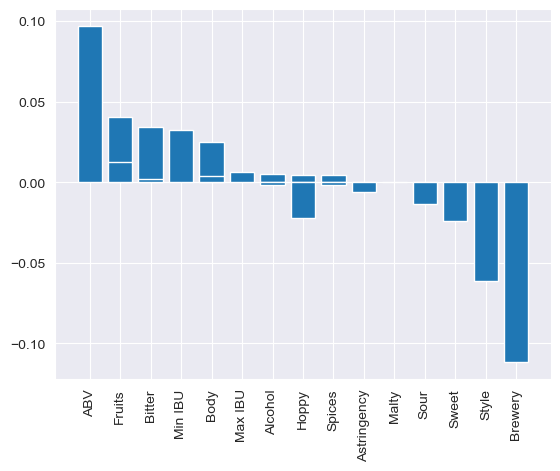

In [297]:
importance = pipe_lr.named_steps['lr'].coef_
feature_names = pipe_lr.named_steps['preprocessing'].transformers_[0][2] + pipe_lr.named_steps['preprocessing'].transformers_[1][2] + pipe_lr.named_steps['preprocessing'].transformers_[2][2]
# Add the feature names to the importance scores
importance_with_names = zip(feature_names, importance)
# Sort the features by importance
sorted_importance = sorted(importance_with_names, key=lambda x: x[1], reverse=True)
# Plot feature importance with names
pyplot.bar([x[0] for x in sorted_importance], [x[1] for x in sorted_importance])
pyplot.xticks(rotation=90)
pyplot.show()

Best features are: ABV, Fruits, Bitter

### 3rd Model: Ridge

In [106]:
# Creating a pipeline that includes preprocessing and Ridge
ridge_pipe = Pipeline([('preprocessing',preprocessor),('ridge',Ridge(normalize=True))])
ridge_pipe.fit(X_train, y_train)
print("Validation score: ", cross_val_score(ridge_pipe,X_train,y_train).mean())
#Test data accuracy score 
y_pred_test_ridge = ridge_pipe.predict(X_test)
ridgetestscore = r2_score(y_test, y_pred_test_ridge)
ridgetestscorermse = mean_squared_error(y_test, y_pred_test_ridge,squared=False)
#Train data accuracy score
y_pred_train_ridge = ridge_pipe.predict(X_train)
ridgetrainscore = r2_score(y_train, y_pred_train_ridge)
ridgetrainscorermse = mean_squared_error(y_train, y_pred_train_ridge,squared=False)
print(f"Train R2: {ridgetrainscore}, Test R2: {ridgetestscore}")
print(f"Train RMSE: {ridgetrainscorermse}, Test RMSE: {ridgetestscorermse}")

Validation score:  0.6503520854787128
Train R2: 0.7673081917482744, Test R2: 0.6768645645868009
Train RMSE: 0.2125041194104468, Test RMSE: 0.2570816572771408


In [107]:
# Defining a hyperparameter grid for Ridge
param_grid = {
    'ridge__alpha': [1,1.5,1.2,2,0.1],
    'ridge__normalize': [True, False],
    'ridge__solver': ['auto', 'saga', 'lbfgs']
    #'ridge__tol': [0.001,0.0001,0.01,0.1]
}

In [108]:
# Defining a GridSearchCV object to search for the best hyperparameters for the pipeline with the hyperparamater grid
ridge_gs = GridSearchCV(
    ridge_pipe,
    param_grid,
    cv=5,
)

ridge_gs.fit(X_train, y_train)

print("Validation score: ", ridge_gs.best_score_)
print("Best hyperparameters: ", ridge_gs.best_params_)

#Test data accuracy score 
y_pred_test_ridge_gs = ridge_gs.best_estimator_.predict(X_test)
ridgetestscoregs = r2_score(y_test, y_pred_test_ridge_gs)
ridgetestscoregsrmse = mean_squared_error(y_test, y_pred_test_ridge_gs,squared=False)
#Train data accuracy score
y_pred_train_ridge_gs = ridge_gs.best_estimator_.predict(X_train)
ridgetrainscoregs = r2_score(y_train, y_pred_train_ridge_gs)
ridgetrainscoregsrmse = mean_squared_error(y_train, y_pred_train_ridge_gs,squared=False)
print(f"Train R2: {ridgetrainscoregs}, Test R2: {ridgetestscoregs}")
print(f"Train RMSE: {ridgetrainscoregsrmse}, Test RMSE: {ridgetestscoregsrmse}")

Validation score:  0.7228542810919805
Best hyperparameters:  {'ridge__alpha': 1, 'ridge__normalize': False, 'ridge__solver': 'auto'}
Train R2: 0.8551531996023402, Test R2: 0.7287423104678263
Train RMSE: 0.16766069387142382, Test RMSE: 0.23554279660157038


### 4th Model: XGB

In [109]:
# Creating a pipeline that includes preprocessing and XG Boosting
pipe_xgb = Pipeline([('preprocessing',preprocessor),('xgb', xgb.XGBRegressor(verbosity = 0, silent=True))])

pipe_xgb.fit(X_train, y_train)

# Printing the mean validation score of the pipeline
print("Validation score: ", cross_val_score(pipe_xgb,X_train,y_train).mean())
#Test data accuracy score 
y_pred_test_xgb = pipe_xgb.predict(X_test)
xgbtestscore = r2_score(y_test, y_pred_test_xgb)
xgbtestscorermse = mean_squared_error(y_test, y_pred_test_xgb,squared=False)
#Train data accuracy score
y_pred_train_xgb = pipe_xgb.predict(X_train)
xgbtrainscore = r2_score(y_train, y_pred_train_xgb)
xgbtrainscorermse = mean_squared_error(y_train, y_pred_train_xgb,squared=False)
print(f"Train R2: {xgbtrainscore}, Test R2: {xgbtestscore}")
print(f"Train RMSE: {xgbtrainscorermse}, Test RMSE: {xgbtestscorermse}")


Validation score:  0.695766277728868
Train R2: 0.8757591338741197, Test R2: 0.7356445785398873
Train RMSE: 0.15527768270536146, Test RMSE: 0.23252674311672142


In [39]:
# Defining a hyperparameter grid for XGB
xgb_grid = {
    "xgb__n_estimators": [1000,1500,3000],
    "xgb__max_depth": [6,9,12,15],
    "xgb__learning_rate":[0.5, 0.1,.001],
    "xgb__gamma":[0.01, .1, .001]
}

In [112]:
# Defining a GridSearchCV object to search for the best hyperparameters for the pipeline with the hyperparamater grid
xgb_pipe = GridSearchCV(estimator=pipe_xgb, param_grid=xgb_grid,n_jobs=-1, cv=5)

# Fitting the pipeline on the training data
xgb_model = xgb_pipe.fit(X_train,y_train)

# Printing validation score and best hyperparemeters
print("Validation score: ", xgb_pipe.best_score_)
print("Best hyperparameters: ", xgb_pipe.best_params_)
#Test data accuracy score 
y_pred_test_xgb = xgb_pipe.best_estimator_.predict(X_test)
xgbtestscore = r2_score(y_test, y_pred_test_xgb)
xgbtestscorermse = mean_squared_error(y_test, y_pred_test_xgb,squared=False)
#Train data accuracy score
y_pred_train_xgb = xgb_pipe.best_estimator_.predict(X_train)
xgbtrainscore = r2_score(y_train, y_pred_train_xgb)
xgbtrainscorermse = mean_squared_error(y_train, y_pred_train_xgb, squared=False)
print(f"Train R2: {xgbtrainscore}, Test R2: {xgbtestscore}")
print(f"Train RMSE: {xgbtrainscorermse}, Test RMSE: {xgbtestscorermse}")


Validation score:  0.7241888963368177
Best hyperparameters:  {'xgb__gamma': 0.001, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 6, 'xgb__n_estimators': 1500}
Train R2: 0.9518495587658475, Test R2: 0.7545110088939004
Train RMSE: 0.09666671084087529, Test RMSE: 0.22407572410210705


In [271]:
pipe_xgb2 = Pipeline([('preprocessing',preprocessor),('xgb', xgb.XGBRegressor(gamma=0.001,learning_rate=0.1,max_depth=6, n_estimators=1500))])

pipe_xgb2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('log',
                                                  FunctionTransformer(func=<function <lambda> at 0x7fc92c0f1f70>),
                                                  ['Astringency', 'Body',
                                                   'Alcohol', 'Bitter', 'Sour',
                                                   'Fruits', 'Hoppy',
                                                   'Spices']),
                                                 ('scaler', StandardScaler(),
                                                  ['ABV', 'Min IBU', 'Max IBU',
                                                   'Astringency', 'Body',
                                                   'Alcohol', 'Bitter', 'Sweet',
                                                   'Sour', 'Fruits', 'Hoppy',
                                                   'Spices', 'Malty']...
                              feature_types

I received good RMSE score for this model, I will go ahead and investigate feature importances.

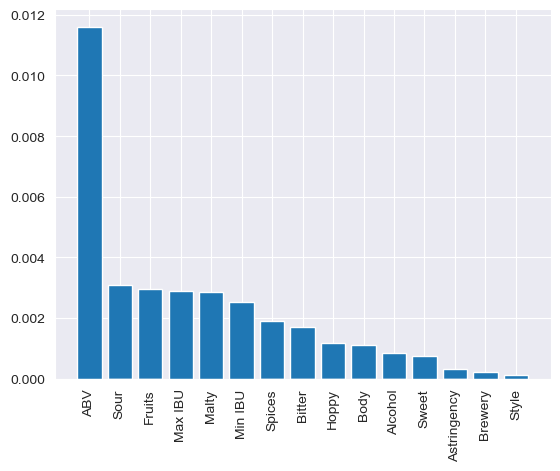

In [289]:
importance = pipe_xgb2.named_steps['xgb'].feature_importances_
feature_names = pipe_xgb2.named_steps['preprocessing'].transformers_[0][2] + pipe_xgb2.named_steps['preprocessing'].transformers_[1][2] + pipe_xgb2.named_steps['preprocessing'].transformers_[2][2]
# Add the feature names to the importance scores
importance_with_names = zip(feature_names, importance)
# Sort the features by importance
sorted_importance = sorted(importance_with_names, key=lambda x: x[1], reverse=True)
# Plot feature importance with names
pyplot.bar([x[0] for x in sorted_importance], [x[1] for x in sorted_importance])
pyplot.xticks(rotation=90)
pyplot.show()

Top 5 important features while predicting Rating as below.

In [276]:
sorted_importance

[('ABV', 0.01160989),
 ('Sour', 0.003091867),
 ('Fruits', 0.0029616235),
 ('Max IBU', 0.0028855458),
 ('Malty', 0.0028503262)]

### 5th Model: Model Stacking

In [145]:
# Defining estimators as models with best hyperparameters for stacking
estimators = [
    ('lr', LinearRegression()),
    ('xgb', xgb.XGBRegressor(gamma= 0.001,learning_rate= 0.1, n_estimators= 1500, max_depth=6))
]

# Defining Stacking Regressor
sr = StackingRegressor(estimators)

In [146]:
# Creating a pipeline with preprocessing step and model stacking
stacked = Pipeline([('preprocessing',preprocessor), ('model', sr)])

# Fitting the train data to pipeline
stacked.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('log',
                                                  FunctionTransformer(func=<function <lambda> at 0x7fc94c9f4c10>),
                                                  ['Astringency', 'Body',
                                                   'Alcohol', 'Bitter', 'Sour',
                                                   'Fruits', 'Hoppy',
                                                   'Spices']),
                                                 ('scaler', StandardScaler(),
                                                  ['ABV', 'Min IBU', 'Max IBU',
                                                   'Astringency', 'Body',
                                                   'Alcohol', 'Bitter', 'Sweet',
                                                   'Sour', 'Fruits', 'Hoppy',
                                                   'Spices', 'Malty']...
                                           

In [147]:
#Model stacking test data accuracy score
y_pred_test_stacked = stacked.predict(X_test)
stackedtestscore = r2_score(y_test, y_pred_test_stacked)
stackedtestscorermse = mean_squared_error(y_test, y_pred_test_stacked, squared=False)
#Train data accuracy score
y_pred_train_stacked = stacked.predict(X_train)
stackedtrainscore = r2_score(y_train, y_pred_train_stacked)
stackedtrainscorermse = mean_squared_error(y_train, y_pred_train_stacked, squared=False)

print(f"Train R2: {stackedtrainscore}, Test R2: {stackedtestscore}")
print(f"Train RMSE: {stackedtrainscorermse}, Test RMSE: {stackedtestscorermse}")

Train R2: 0.9433176307305954, Test R2: 0.7765407066891912
Train RMSE: 0.10488196213799642, Test RMSE: 0.2137853831510045


### Model Comparison
From all the models so far, stacked model for LR and XGB is the best model for average beer rating prediction since it has the least RMSE score.

## Beer Recommendation Systems

In this section, I will use cosine similarity and euclidean distance to recommend similar beers.

### Cosine Similarity

In [205]:
# Transforming data using the preprocessor
X = preprocessor.fit_transform(df_pp)

# Computing pairwise cosine similarity matrix
cosine_sim_matrix = cosine_similarity(X)

# Defining function to get top 5 similar beers
def get_top_similar_beers(beer_name):
    idx = df[df['Name'] == beer_name].index[0]
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    beer_indices = [i[0] for i in sim_scores]
    return df.drop(columns=['key','Style Key', 'Description']).iloc[beer_indices]


In [42]:
# Below codes can be used to search beers and breweries within dataset.
# df[df['Brewery'].str.contains('')]
# df[df['Name'].str.contains('')]

With the created function, I can recommend 5 similar beers to a given beer using cosine similarity.

In [316]:
get_top_similar_beers('Elephant Beer')

,Name,Style,Brewery,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
2206,Hevelius Kaper,Lager - European Strong,Elbrewery Co. Ltd. Sp. z o.o.,8.7,3.42,15,40,10,27,49,29,68,31,2,28,36,9,73
2230,Debowe MocneTyskie Browary Książęce (SABMiller),Lager - European Strong,Tyskie Browary Książęce (SABMiller),7.0,3.22,15,40,10,29,29,35,36,14,1,12,42,3,50
2231,Lomza Mocne,Lager - European Strong,Browar Łomża Sp. z o.o.,7.8,3.10,15,40,19,33,42,33,82,31,1,44,55,8,82
2207,Bavaria 8.6 Original,Lager - European Strong,Swinkels Family Brewers,7.9,2.56,15,40,8,35,45,19,65,20,0,22,30,8,52
2243,Slavutich Mitzne,Lager - European Strong,Slavutych Brewery,7.2,2.78,15,40,17,35,45,24,56,27,3,30,28,5,64


### Euclidean Distance

In [43]:
# Applying the preprocessor to the data
X = preprocessor.fit_transform(df_pp)

# Creating a Nearest Neighbors model using the Euclidean distance metric
model = NearestNeighbors(metric='euclidean')

# Fit the model on the preprocessed data
model.fit(X)

def recommend_beers(beer_name):
    # Find the index of the input beer
    index = df[df['Name'] == beer_name].index[0]
    
    # Get the preprocessed data for the input beer
    beer_data = X[index].reshape(1, -1)
    
    # Find the 5 nearest beers based on Euclidean distance
    distances, indices = model.kneighbors(beer_data, n_neighbors=6)
    
    # Return the top 5 recommended beers (excluding the input beer itself)
    recommended_beers = df.iloc[indices.flatten()][1:]
    
    return recommended_beers

With the created function, I can recommend 5 similar beers to a given beer using cosine similarity.

In [44]:
recommend_beers('Elephant Beer')

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
2230,Debowe MocneTyskie Browary Książęce (SABMiller),2481,Lager - European Strong,58,Tyskie Browary Książęce (SABMiller),Notes:,7.0,3.22,15,40,...,29,29,35,36,14,1,12,42,3,50
2206,Hevelius Kaper,2457,Lager - European Strong,58,Elbrewery Co. Ltd. Sp. z o.o.,Notes:,8.7,3.42,15,40,...,27,49,29,68,31,2,28,36,9,73
2207,Bavaria 8.6 Original,2458,Lager - European Strong,58,Swinkels Family Brewers,Notes:,7.9,2.56,15,40,...,35,45,19,65,20,0,22,30,8,52
2201,Baltika #9 Extra (Strong),2452,Lager - European Strong,58,Baltika Breweries,Notes:,8.0,2.85,15,40,...,23,50,21,76,21,1,24,32,6,66
2243,Slavutich Mitzne,2494,Lager - European Strong,58,Slavutych Brewery,Notes:,7.2,2.78,15,40,...,35,45,24,56,27,3,30,28,5,64


## Project Summary

This project aimed to develop a beer rating predictor and recommendation system using Beer dataset. The project included an exploratory data analysis phase, followed by the creation of baseline models and more advanced models using pipelines and grid searches. The performance of these models was evaluated on a hold-out test set, and the best-performing model was identified for genre classification.
\
\
After investigating the data, regression models were created. Five different pipelines were created with different classifiers, and hyperparameter tuning was used to improve the accuracy scores. Stacked model for XG Boost and Linear Regression was identified as the best model for beer rating prediction with a RMSE score of 0.2137.
\
\
The project also identified the best predictors for beer rating as ABV, fruitiness and bitterness. 
\
\
Finally, 2 recommendation systems were created to recommend 5 similar beers for a given beer using cosine similarity and euclidean distance. 
\
\
Overall, the project successfully developed a beer rating predictor and recommendation system that can be used by Rum & Lemonade Bistro to brew their new beer in the best way possible and provided insights into which features should be targeted to maximize profits.